In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# create engine to hawaii.sqlite (BZ had to add Resources/)
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()

# reflect the tables
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys() 

['measurement', 'station']

In [20]:
# Save references to each table
# Assign the dow class to a variable called `Dow`
Measurement = Base.classes.measurement
Station = Base.classes.station
print(f'Measurement: {Measurement}')
print(f'Station: {Station}')

Measurement: <class 'sqlalchemy.ext.automap.measurement'>
Station: <class 'sqlalchemy.ext.automap.station'>


In [48]:
# Create our session (link) from Python to the DB
# Create a session
session = Session(engine)

In [97]:
# Display the row's columns and data in dictionary format
# Use the session to query Measurement table and display the row's columns and data in dictionary format
M=Measurement
Measurement_row = session.query(M).first()
print(f'Measurement_row.__dict__: {Measurement_row.__dict__}')

for row in session.query(M.date, M.tobs, M.id, M.station, M.prcp).limit(10).all():
    print(row)
    
S=Station
Station_row = session.query(S).first()
print(f'Station_row.__dict__: {Station_row.__dict__}')

for row in session.query(S.id, S.longitude, S.latitude, S.station, S.name, S.elevation).limit(3).all():
    print(row)

Measurement_row.__dict__: {'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000025DA2E06D00>, 'date': '2010-01-01', 'tobs': 65.0, 'id': 1, 'station': 'USC00519397', 'prcp': 0.08}
('2010-01-01', 65.0, 1, 'USC00519397', 0.08)
('2010-01-02', 63.0, 2, 'USC00519397', 0.0)
('2010-01-03', 74.0, 3, 'USC00519397', 0.0)
('2010-01-04', 76.0, 4, 'USC00519397', 0.0)
('2010-01-06', 73.0, 5, 'USC00519397', None)
('2010-01-07', 70.0, 6, 'USC00519397', 0.06)
('2010-01-08', 64.0, 7, 'USC00519397', 0.0)
('2010-01-09', 68.0, 8, 'USC00519397', 0.0)
('2010-01-10', 73.0, 9, 'USC00519397', 0.0)
('2010-01-11', 64.0, 10, 'USC00519397', 0.01)
Station_row.__dict__: {'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000025DA6FFC100>, 'id': 1, 'longitude': -157.8168, 'latitude': 21.2716, 'station': 'USC00519397', 'name': 'WAIKIKI 717.2, HI US', 'elevation': 3.0}
(1, -157.8168, 21.2716, 'USC00519397', 'WAIKIKI 717.2, HI US', 3.0)
(2, -157.8015, 21.4234, 'USC00513117', 'KANE

# Exploratory Precipitation Analysis

In [180]:
# Find the most recent date in the data set.
# Found Lesson 10.2.9 helpful for this part (09-Par_EmojiPlotting)

# max_date = [result[0] for result in results[:1]]
# print(f'max_date: {max_date[0:1]}')

# Calculate the date one year from the last date in data set.
most_recent_date = max(results)
print("most_recent_date[0]: ", most_recent_date[0])
print()
min_date = dt.date(int(max_date[0][0:4]), int(max_date[0][5:7]), int(max_date[0][8:10])) - dt.timedelta(days=365)
print("Minimun Date: ", min_date)
print()


most_recent_date[0]:  2017-08-23

Minimun Date:  2016-08-23



date_prcp: [('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0)]


date: ['2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26', '2016-08-27', '2016-08-28', '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01']


prcp: [0.0, 0.08, 0.08, 0.0, 0.0, 0.01, 0.0, 0.0, 0.13, 0.0]


df:         Date  Percipitation
0  2016-08-23           0.00
1  2016-08-24           0.08
2  2016-08-25           0.08
3  2016-08-26           0.00
4  2016-08-27           0.00
5  2016-08-28           0.01
6  2016-08-29           0.00
7  2016-08-30           0.00
8  2016-08-31           0.13
9  2016-09-01           0.00

df after set_index:            Percipitation
Date                     
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

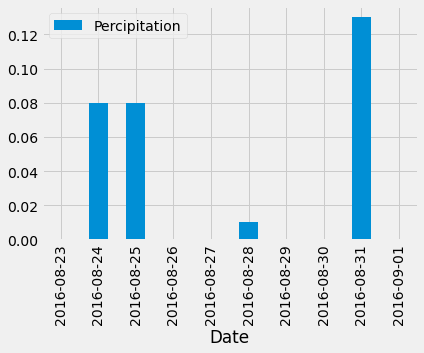

In [208]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# results = session.query(M.date, M.tobs, M.id, M.station, M.prcp).\
#     order_by(M.date.desc()).all()
# Unpack `date` and 'percipitation' from results and save into separate list
# dates = [result[0] for result in results[:10]]
# percip = [result[4] for result in results[:10]]
# results = session.query(M.date, M.tobs, M.id, M.station, M.prcp).all()
# # print(len(results))
# print("len(results): ", len(results))


# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(M.date, M.prcp).\
    filter(M.date >= min_date).limit(10).all()

date = [date_prcp[0] for date_prcp in date_prcp]
prcp = [date_prcp[1] for date_prcp in date_prcp]

print(f'date_prcp: {date_prcp}')
print()
print()
print(f'date: {date}')
print()
print()
print(f'prcp: {prcp}')
print()
print()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(date_prcp, columns=['Date', 'Percipitation'])
print(f'df:{df}')
print()

df.set_index('Date', inplace=True)
print(f'df after set_index:{df}')
print()

# Sort the dataframe by date
# df.sort_values(by='Date', ascending=False)
# print('df after sort by date: ')
# print(df)
# print()

df.plot.bar()
# ax.set_xticklabels(map(line_format, df.index))

x_labels = [108300.0, 110540.0, 112780.0, 115020.0, 117260.0, 119500.0, 
            121740.0, 123980.0, 126220.0, 128460.0, 130700.0]
plt.set_xlabel('Amount ($)')

plt.tight_layout()
plt.show()

# Use Pandas Plotting with Matplotlib to plot the data
# Found Lesson 10.3.3 helpful for this part (03-Stu_Dates)
# # Plot the Results in a Matplotlib bar chart
# df = pd.DataFrame(may_averages, columns=['stock', 'open_avg', 'high_avg', 'low_avg', 'close_avg'])
# df.set_index('stock', inplace=True)
# df.plot.bar()
# plt.tight_layout()
# plt.show()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [35]:
# Close Session
session.close()